In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv


In [58]:
# criando o dataframe
df = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')

# selecionando as colunas
df = df[['Gender','Age', 'Own_car', 'Own_property', 'Unemployed', 'Num_children']]
df

,Gender,Age,Own_car,Own_property,Unemployed,Num_children
0,1,32.868574,1,1,0,0
1,1,58.793815,1,1,0,0
2,0,52.321403,0,1,0,0
3,0,61.504343,0,1,1,0
4,1,46.193967,1,1,0,0
...,...,...,...,...,...,...
9704,0,56.400884,0,0,0,0
9705,0,43.360233,0,1,0,0
9706,1,52.296762,1,1,0,0
9707,0,33.914454,0,1,0,0


In [59]:
# as idades agora em valores inteiros
df['Age'] = df['Age'].astype(int)
df

,Gender,Age,Own_car,Own_property,Unemployed,Num_children
0,1,32,1,1,0,0
1,1,58,1,1,0,0
2,0,52,0,1,0,0
3,0,61,0,1,1,0
4,1,46,1,1,0,0
...,...,...,...,...,...,...
9704,0,56,0,0,0,0
9705,0,43,0,1,0,0
9706,1,52,1,1,0,0
9707,0,33,0,1,0,0


In [60]:
print(df['Num_children'].value_counts())

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64


In [61]:
# deixando apenas pessoas com 5 ou menos filhos, mais podendo ser um erro
df = df[df['Num_children'] <= 5]
df

,Gender,Age,Own_car,Own_property,Unemployed,Num_children
0,1,32,1,1,0,0
1,1,58,1,1,0,0
2,0,52,0,1,0,0
3,0,61,0,1,1,0
4,1,46,1,1,0,0
...,...,...,...,...,...,...
9704,0,56,0,0,0,0
9705,0,43,0,1,0,0
9706,1,52,1,1,0,0
9707,0,33,0,1,0,0


In [129]:
# dataframes dividos por genero 
df_men = df[df['Gender'] == 0]
df_women = df[df['Gender'] == 1]

Gender
0    6321
1    3385
Name: count, dtype: int64


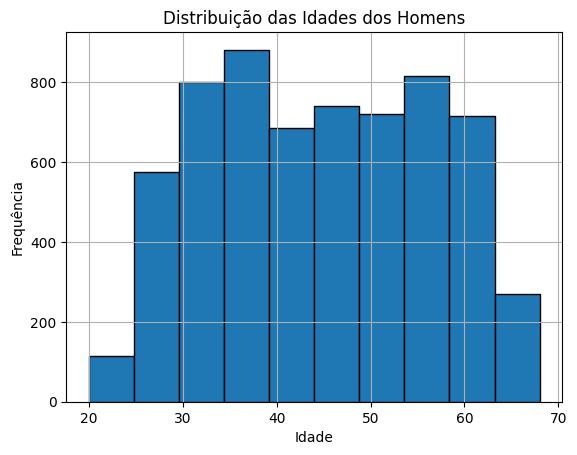

In [122]:
import matplotlib.pyplot as plt

# Criar o histograma
plt.hist(df_men['Age'], bins=10, edgecolor='black')

# Adicionar título e rótulos
plt.title('Distribuição das Idades dos Homens')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.grid(True)
# Mostrar o gráfico
plt.show()

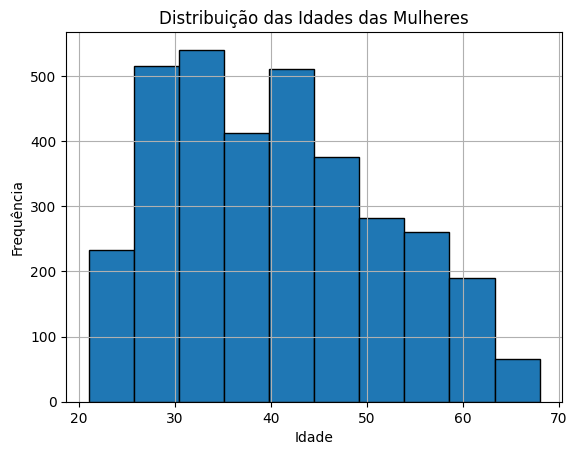

In [123]:
import matplotlib.pyplot as plt

# Criar o histograma
plt.hist(df_women['Age'], bins=10, edgecolor='black')

# Adicionar título e rótulos
plt.title('Distribuição das Idades das Mulheres')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.grid(True)
# Mostrar o gráfico
plt.show()

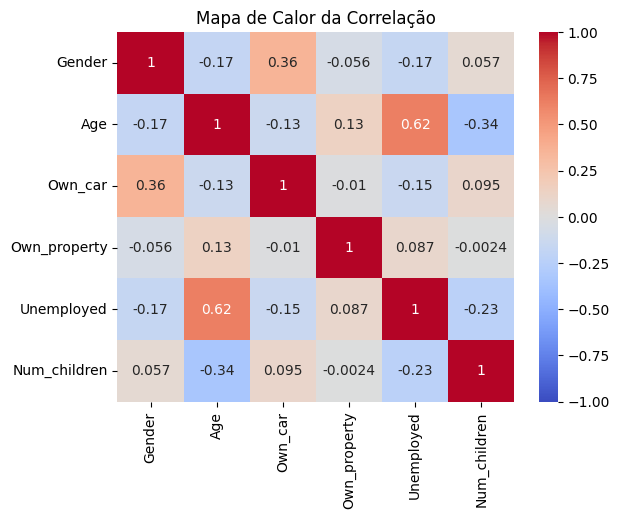

In [124]:
import seaborn as sns
# Calcular a matriz de correlação
corr = df.corr()

# Criar o heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Adicionar título
plt.title('Mapa de Calor da Correlação')

# Mostrar o gráfico
plt.show()

**Podemos observar uma correlação moderada positiva entre a Idade {Age} e o Desemprego{Unemployed}**

In [125]:
import plotly.graph_objects as go

# Dados
categories = ['Possui ambos', 'Não possui ambos', 'Apenas Carro', 'Apenas Propriedade']
counts = [count_own_car_and_property, count_no_own_car_and_property, count_own_car_no_property, count_no_own_car_property]

# Criando o gráfico com Plotly
fig = go.Figure(data=[go.Bar(x=counts, y=categories, orientation='h', marker_color='skyblue')])


# Atualizando layout
fig.update_layout(title='Contagem de recursos próprios',
                  xaxis_title='Counts',
                  yaxis_title='Categories')

# Exibindo o gráfico
fig.show()


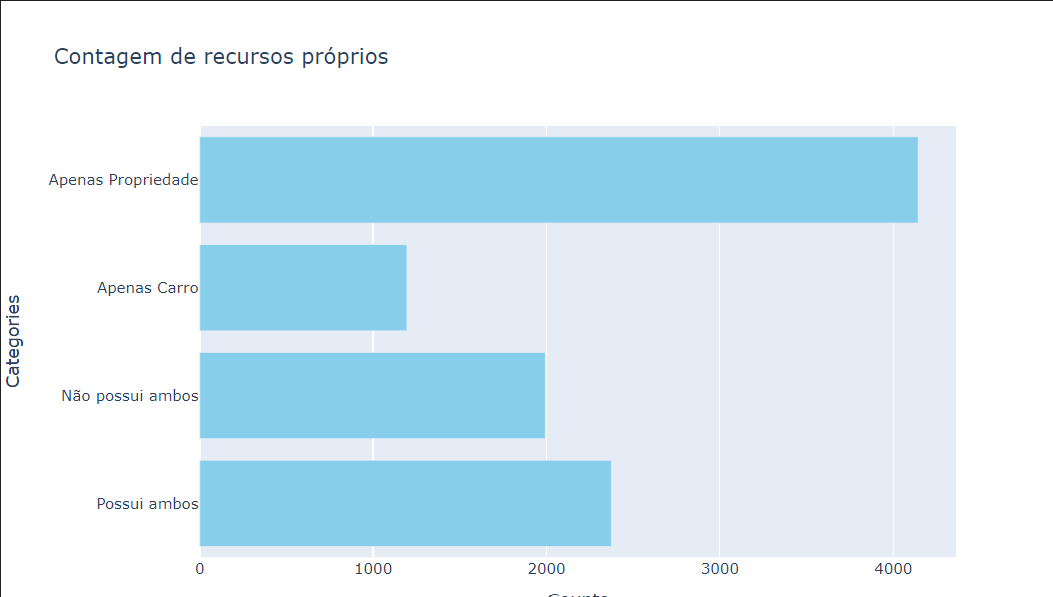
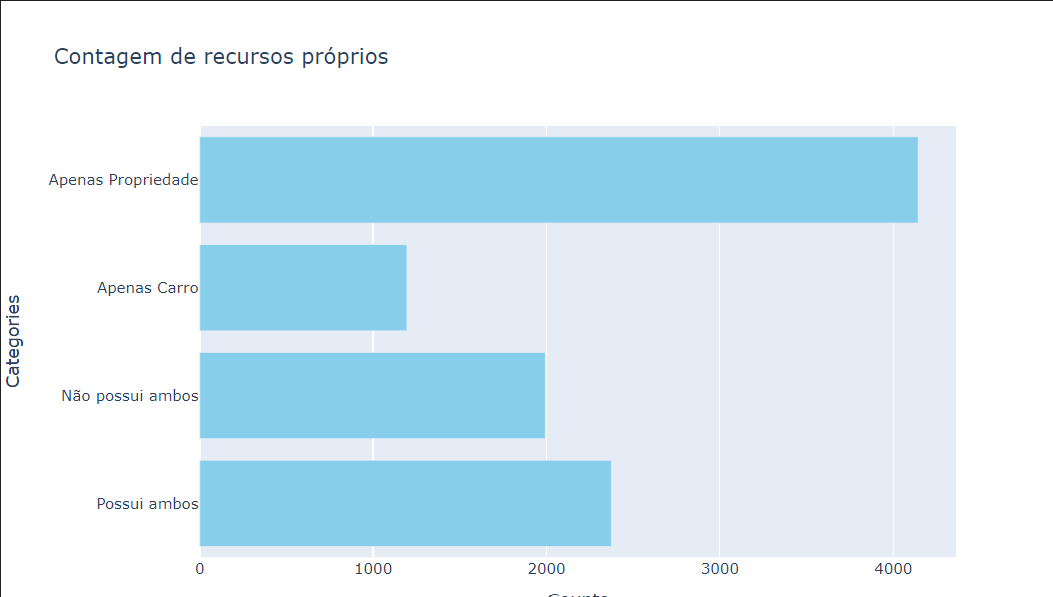

In [107]:
import plotly.graph_objects as go

# Dados
pais_a = df[(df['Own_car'] == 1) & (df['Own_property'] == 1) & (df['Num_children'] > 0)].shape[0]
pais_b = df[((df['Own_car'] == 0) | (df['Own_property'] == 0)) & (df['Num_children'] > 0)].shape[0]


porcentagens = [pais_a, pais_b]
categorias = ['Possui Carro e Propriedade', 'Não Possui Carro ou Propriedade']
cores_personalizadas = ['#00FF7F', '	#CD5C5C']  # Adicione cores personalizadas aqui

# Criando o gráfico de rosca
fig = go.Figure(data=[go.Pie(labels=categorias, values=porcentagens, hole=0.6,
                             marker=dict(colors=cores_personalizadas))])

# Ajustes
fig.update_layout(title='Distribuição de Famílias com Crianças')

# Mostrar o gráfico
fig.show()



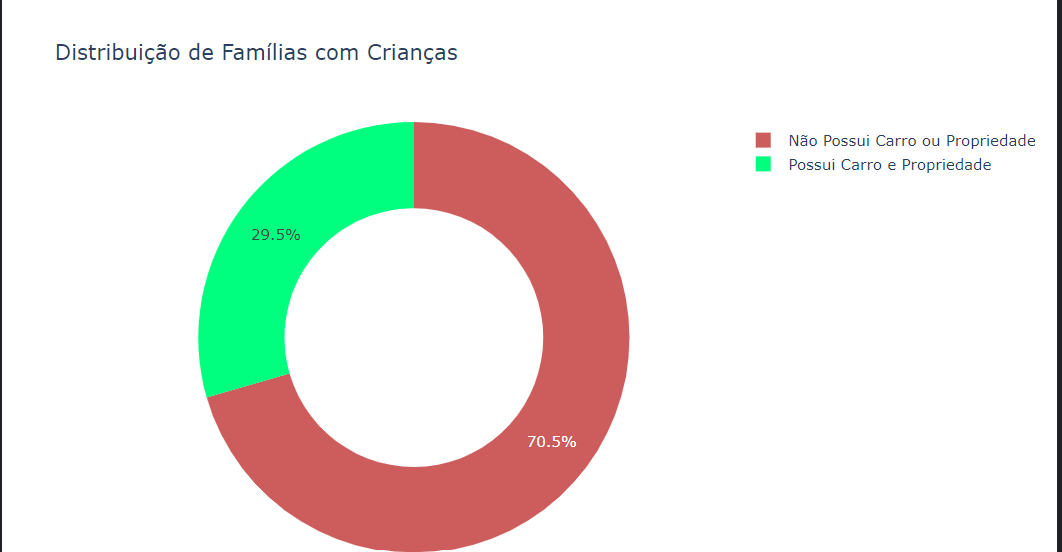